In [24]:
#多个
import re
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 10  # 替换成你想要的字体大小
# 定义数据

eval_methods = ['kw_matching', 'harmbench','llamaguard']
models=['llama2','vicuna']
folders = ['_mean']

average={}

# 创建2x2子图
# 使用for循环绘制每个子图
for i, eval_method in enumerate(eval_methods):
    for j, model in enumerate(models):
        newmodel=model
        neweval_method=eval_method
        if model=='llama2':
            newmodel='Llama-2'
        if eval_method=='kw_matching':
            neweval_method='keyword matching'
        elif eval_method=='harmbench':
            neweval_method='HarmBench'
        elif eval_method=='llamaguard':
            neweval_method='Llama Guard'
        average[neweval_method+' on '+newmodel]=[]
        for folder in folders:
            path='/home/yjj/project/llm-attacks/experiments/'+model+folder+'/'
            rounds=os.listdir(path)
            dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
            for dirpath in dirpaths:
                for path in os.listdir(dirpath):
                    if path.endswith('log') and path.startswith('eval'):
                        al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                        with open(os.path.join(dirpath,path),'r') as alpha:
                            content=alpha.read()
                            res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                            res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                            prev=res[0][1]
                            for k in range(len(res)):
                                if res[k][2]==0:
                                    res[k][1]=prev
                                prev=res[k][1]
                        if(len(res)!=11):
                            print(path)
                        average[neweval_method+' on '+newmodel].append([k[1] for k in res])
average

{'keyword matching on Llama-2': [[0, 0, 10, 14, 14, 35, 35, 35, 35, 35, 35],
  [0, 1, 9, 26, 26, 26, 26, 26, 26, 26, 26],
  [0, 0, 3, 6, 34, 34, 34, 34, 34, 34, 34],
  [0, 1, 9, 7, 7, 9, 9, 9, 9, 9, 9],
  [0, 0, 10, 10, 5, 5, 5, 5, 5, 7, 7],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 'keyword matching on vicuna': [[0, 6, 3, 3, 3, 3, 3, 3, 3, 4, 4],
  [0, 10, 8, 11, 11, 10, 10, 10, 10, 10, 10],
  [0, 4, 4, 6, 6, 5, 3, 3, 3, 9, 7],
  [0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12],
  [0, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6],
  [0, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9]],
 'HarmBench on Llama-2': [[0, 0, 5, 8, 8, 26, 26, 26, 26, 26, 26],
  [0, 0, 6, 15, 15, 15, 15, 15, 15, 15, 15],
  [0, 0, 0, 7, 32, 32, 32, 32, 32, 32, 32],
  [0, 0, 7, 10, 10, 9, 9, 9, 9, 9, 9],
  [0, 0, 13, 13, 4, 4, 4, 4, 4, 4, 4],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 'HarmBench on vicuna': [[0, 5, 3, 4, 4, 4, 4, 4, 4, 2, 2],
  [0, 8, 9, 9, 9, 10, 10, 10, 10, 10, 10],
  [0, 5, 5, 5, 5, 4, 4, 4, 4, 8, 8],
  [0, 9, 9, 9, 6, 6, 6, 6, 6, 6, 11],
  [0, 7

In [25]:
eval_methods = ['kw_matching', 'harmbench','llamaguard']
models=['llama2','vicuna']
folders = ['_lasthiddenstate']

last={}

# 创建2x2子图
# 使用for循环绘制每个子图
for i, eval_method in enumerate(eval_methods):
    for j, model in enumerate(models):
        newmodel=model
        neweval_method=eval_method
        if model=='llama2':
            newmodel='Llama-2'
        if eval_method=='kw_matching':
            neweval_method='keyword matching'
        elif eval_method=='harmbench':
            neweval_method='HarmBench'
        elif eval_method=='llamaguard':
            neweval_method='Llama Guard'
        last[neweval_method+' on '+newmodel]=[]
        for folder in folders:
            path='/home/yjj/project/llm-attacks/experiments/'+model+folder+'/'
            rounds=os.listdir(path)
            dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
            for dirpath in dirpaths:
                for path in os.listdir(dirpath):
                    if path.endswith('log') and path.startswith('eval'):
                        al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                        with open(os.path.join(dirpath,path),'r') as alpha:
                            content=alpha.read()
                            res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                            res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                            prev=res[0][1]
                            for k in range(len(res)):
                                if res[k][2]==0:
                                    res[k][1]=prev
                                prev=res[k][1]
                        if(len(res)!=11):
                            print(path)
                        last[neweval_method+' on '+newmodel].append([k[1] for k in res])
last

{'keyword matching on Llama-2': [[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2],
  [0, 0, 1, 4, 1, 3, 3, 3, 3, 3, 3],
  [0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8],
  [0, 2, 0, 0, 0, 3, 3, 1, 1, 1, 1],
  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 'keyword matching on vicuna': [[0, 3, 3, 2, 2, 2, 2, 2, 2, 2, 7],
  [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 5],
  [0, 7, 6, 6, 6, 6, 6, 8, 6, 6, 6],
  [0, 4, 5, 5, 5, 4, 3, 3, 3, 3, 3],
  [0, 8, 15, 14, 14, 14, 8, 14, 14, 14, 14],
  [0, 7, 7, 6, 3, 3, 3, 3, 3, 13, 9]],
 'HarmBench on Llama-2': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
  [0, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6],
  [0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 'HarmBench on vicuna': [[0, 3, 3, 2, 2, 2, 2, 2, 2, 2, 6],
  [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 8],
  [0, 7, 6, 6, 6, 6, 6, 7, 8, 8, 8],
  [0, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4],
  [0, 10, 16, 15, 15, 15, 12, 17, 17, 17, 17],
  [0, 7, 7, 7, 3, 3

In [26]:
for k,v in average.items():
    average[k]=np.array(v)

In [27]:
for k,v in last.items():
    last[k]=np.array(v)

In [28]:

data=[[(np.mean(average[k][:,-1]),np.mean(last[k][:,-1])),(np.std(average[k][:,-1]),np.std(last[k][:,-1]))] for k in average]
data

[[(18.5, 2.5), (13.744695946679455, 2.6299556396765835)],
 [(8.0, 7.333333333333333), (2.6457513110645907, 3.4960294939005054)],
 [(14.333333333333334, 1.1666666666666667),
  (11.469767022723502, 2.192157739660984)],
 [(7.166666666666667, 9.333333333333334),
  (3.1841621957571333, 4.384315479321969)],
 [(16.833333333333332, 1.1666666666666667),
  (12.442088070559361, 2.192157739660984)],
 [(0.5, 1.5), (0.5, 2.140872096444188)]]

In [29]:
data[0]

[(18.5, 2.5), (13.744695946679455, 2.6299556396765835)]

In [30]:
average.keys()

dict_keys(['keyword matching on Llama-2', 'keyword matching on vicuna', 'HarmBench on Llama-2', 'HarmBench on vicuna', 'Llama Guard on Llama-2', 'Llama Guard on vicuna'])

(18.5, 2.5) (13.744695946679455, 2.6299556396765835)
18.5
2.5
(8.0, 7.333333333333333) (2.6457513110645907, 3.4960294939005054)
8.0
7.333333333333333
(14.333333333333334, 1.1666666666666667) (11.469767022723502, 2.192157739660984)
14.333333333333334
1.1666666666666667
(7.166666666666667, 9.333333333333334) (3.1841621957571333, 4.384315479321969)
7.166666666666667
9.333333333333334
(16.833333333333332, 1.1666666666666667) (12.442088070559361, 2.192157739660984)
16.833333333333332
1.1666666666666667
(0.5, 1.5) (0.5, 2.140872096444188)
0.5
1.5


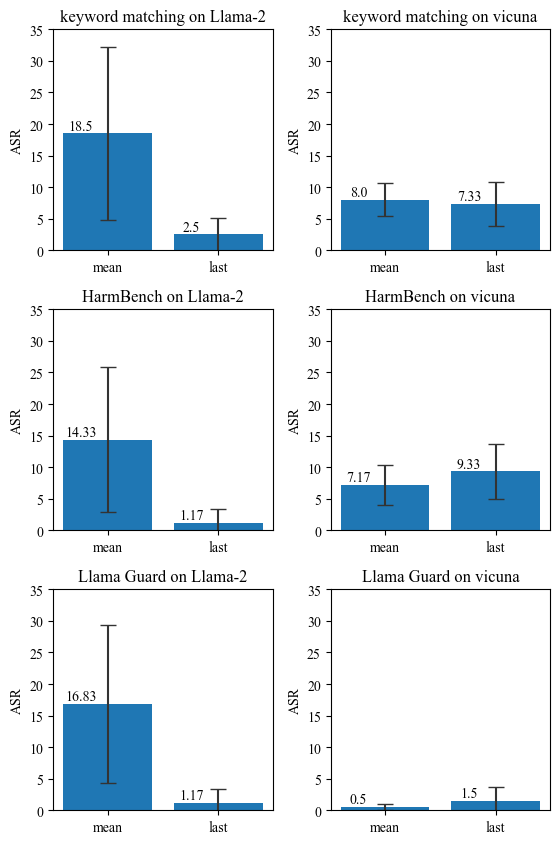

In [31]:
import matplotlib.pyplot as plt
import numpy as np


data=[[(np.mean(average[k][:,-1]),np.mean(last[k][:,-1])),(np.std(average[k][:,-1]),np.std(last[k][:,-1]))] for k in average]
data

# 设置图的尺寸，每行两个图，总共三行
fig, axes = plt.subplots(3, 2, figsize=(6, 9))


# 设置每个柱状图的数据
for i, ax in enumerate(axes.flat):
    means, stds = data[i]
    print(means,stds)
    bars=ax.bar(np.arange(len(means)), means, yerr=stds,error_kw = {'ecolor' : '0.2', 'capsize' :6 })
    ax.set_title(list(average.keys())[i])
    ax.set_xticks(np.arange(len(means)))
    ax.set_xticklabels(['mean', 'last'])
    ax.set_ylim(0, 35)  # 你可以根据需要调整y轴的范围
    ax.set_ylabel('ASR')
    for bar in bars:
        yval = bar.get_height()
        print(yval)
        ax.text(bar.get_x() + bar.get_width()*1/5, yval + 0.1, round(yval, 2),
                ha='center', va='bottom')  # 在柱子顶部显示数值
# 调整布局，使子图不重叠
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # 调整以给全局标签留出空间
plt.savefig('my_method.png')
plt.show()
